In [ ]:
# general
import os
import gc
import sys
from datetime import timedelta

# wranglers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# custom modules
cwd = os.getcwd()
parent = cwd.replace('/notebooks', '')
sys.path.insert(0, parent) 

from scripts.utils import (DataLoader, 
                            Plotters, 
                            CleanDataFrame, 
                            Analysis)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
analyzer = Analysis()
cleaner = CleanDataFrame()
plotter = Plotters(w=7, h=5)

In [ ]:
df = DataLoader("../data", "Week1_challenge_data_source.csv").read_csv()
df = cleaner.rename_columns(df)
df = cleaner.fix_datatypes(df)
df = cleaner.handle_missing_value(df, verbose=False)

df.shape

In [ ]:
# Group users
users_data = df.groupby('MSISDN/Number')

# Get sessions frequency (count the number of sessions)
users_sessions_frequency = users_data['Bearer Id'].count()
users_sessions_frequency
# How long each session was
users_sessions_duration = users_data['Dur. ms'].sum()
users_sessions_duration
# data volume per session
apps = ['Social Media DL (Bytes)',
        'Social Media UL (Bytes)',
        'Google DL (Bytes)',
        'Google UL (Bytes)',
        'Email DL (Bytes)',
        'Email UL (Bytes)',
        'Youtube DL (Bytes)',
        'Youtube UL (Bytes)',
        'Netflix DL (Bytes)',
        'Netflix UL (Bytes)',
        'Gaming DL (Bytes)',
        'Gaming UL (Bytes)',
        'Other DL (Bytes)',
        'Other UL (Bytes)']
user_session_data_vol = users_data[apps].sum().sum(axis=1)
user_session_data_vol

In [ ]:
user_engagment = pd.DataFrame(
    {
        "MSISDN": users_sessions_frequency.index.values,
        "session_freq": users_sessions_frequency.values,
        "session_duration": users_sessions_duration.values,
        "session_data_volume": user_session_data_vol.values
    }
)
user_engagment.sort_values(['session_freq', 'session_duration', 'session_data_volume'],
                           ascending=False, inplace=True)
user_engagment.reset_index(drop=True, inplace=True)
user_engagment.head()

In [ ]:
top_ten_customers = user_engagment.head(10)
top_ten_customers

In [ ]:
top_ten_session_freq = analyzer.get_top_ten(user_engagment, 'session_freq')
top_ten_session_duration = analyzer.get_top_ten(user_engagment, 'session_duration')
top_ten_session_dat_vol = analyzer.get_top_ten(user_engagment, 'session_data_volume')

In [ ]:
top_ten_session_dat_vol

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

In [ ]:
import seaborn as sns

In [ ]:
g = sns.PairGrid(user_engagment)
g.map(sns.scatterplot);

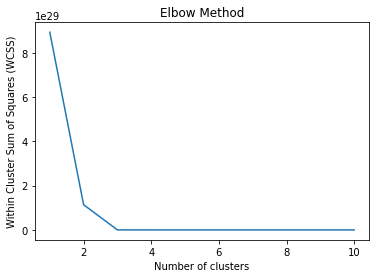

In [25]:
X = np.array(user_engagment.loc[:, :]).reshape(-1, 2)
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)




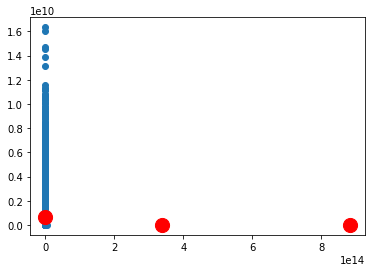

In [27]:
# Plot the data
import matplotlib.pyplot as plt 
X = pd.DataFrame({'x':X[:, 0], 'y': X[:, 1]}).astype(np.float64)
plt.scatter(X['x'], 
            X['y'])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [28]:
# X.astype(np.float64).plot.scatter(x='x', y='y')